<h1>Ações escolhidas: Eztec (EZTC3), Equatorial (EQTL3), Taesa (TAEE11), RaiaDrogasil (RADL3) e Sanepar (SAPR4)</h1>

<h2>Aluno: Igor Matheus Pereira de Azevedo</h2>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
dataset = pd.read_csv('acoes.csv')
dataset.head(3)

,Date,Eztec,Equatorial,Taesa,RaiaDrogasil,Sanepar,Ibovespa
0,2015-01-02,16.923035,5.500,18.850000,4.998,1.916666,47.259998
1,2015-01-05,15.980684,5.290,18.780001,4.964,1.783333,46.320000
2,2015-01-06,16.373331,5.588,18.809999,5.108,1.783333,46.580002


In [ ]:
def alocacao_ativos(dataset, dinheiro_total, seed = 1000, melhores_pesos = []):
  dataset = dataset.copy()

  if seed != 0:
    np.random.seed(seed)

  if len(melhores_pesos) > 0:
    pesos = melhores_pesos
  else:
    pesos = np.random.random(len(dataset.columns) - 1)
    pesos = pesos/pesos.sum()

  colunas = dataset.columns[1:]

  for i in colunas:
    dataset[i] = (dataset[i] / dataset[i][0])

  for i, acao in enumerate(dataset.columns[1:]):
    dataset[acao] = dataset[acao] * pesos[i] * dinheiro_total
  
  dataset['soma valor'] = dataset.sum(axis=1)

  datas = dataset['Date']

  dataset.drop(labels=['Date'], axis=1, inplace=True)
  dataset['taxa retorno'] = 0.0

  for i in range (1, len(dataset)):
    dataset['taxa retorno'][i] = ((dataset['soma valor'][i] / dataset['soma valor'][i - 1]) - 1) * 100

  acoes_pesos = pd.DataFrame(data= {'Ações': colunas, 'Pesos': pesos *  100})

  return dataset, datas, acoes_pesos, dataset.loc[len(dataset) - 1]['soma valor']

In [ ]:
dataset, datas, acoes_pesos, soma_valor = alocacao_ativos(pd.read_csv('acoes.csv'), 9500, 10000)

In [ ]:
datas

0       2015-01-02
1       2015-01-05
2       2015-01-06
3       2015-01-07
4       2015-01-08
           ...    
1643    2021-08-19
1644    2021-08-20
1645    2021-08-23
1646    2021-08-24
1647    2021-08-25
Name: Date, Length: 1648, dtype: object

In [ ]:
acoes_pesos

,Ações,Pesos
0,Eztec,22.173893
1,Equatorial,6.986493
2,Taesa,34.672509
3,RaiaDrogasil,7.326257
4,Sanepar,23.931231
5,Ibovespa,4.909617


In [ ]:
soma_valor

23008.488002027312

In [ ]:
figura = px.line(x = datas, y = dataset['taxa retorno'], title='Retorno Diário')
figura.show()

In [ ]:
figura = px.line(title = 'Evolução')
for i in dataset.drop(columns = ['soma valor', 'taxa retorno']).columns:
  figura.add_scatter(x = datas, y = dataset[i], name = i)
figura.show()

In [ ]:
figura = px.line(x = datas, y = dataset['soma valor'], title='Variação do patrimônio')
figura.show()

In [ ]:
dataset.loc[len(dataset) - 1]['soma valor'] / dataset.loc[0]['soma valor'] - 1

1.4219461054765592

In [ ]:
dataset['taxa retorno'].std()

1.5216819803748955

In [ ]:
(dataset['taxa retorno'].mean() / dataset['taxa retorno'].std()) * np.sqrt(246)

0.6737328500691292

In [ ]:
dinheiro_total = 9500
soma_valor - dinheiro_total

13508.488002027312

In [ ]:
selic_2015 = 12.75
selic_2016 = 14.25
selic_2017 = 12.25
selic_2018 = 6.5
selic_2019 = 5.0
selic_2020 = 2.75

In [ ]:
valor_2015 = dinheiro_total + (dinheiro_total * selic_2015 / 100)
valor_2015

10711.25

In [ ]:
valor_2016 = dinheiro_total + (dinheiro_total * selic_2016 / 100)
valor_2016

10853.75

In [ ]:
valor_2017 = dinheiro_total + (dinheiro_total * selic_2017 / 100)
valor_2017

10663.75

In [ ]:
valor_2018 = dinheiro_total + (dinheiro_total * selic_2018 / 100)
valor_2018

10117.5

In [ ]:
valor_2019 = dinheiro_total + (dinheiro_total * selic_2019 / 100)
valor_2019

9975.0

In [ ]:
valor_2020 = dinheiro_total + (dinheiro_total * selic_2020 / 100)
valor_2020

9761.25

In [ ]:
rendimentos = valor_2020 - dinheiro_total
rendimentos

261.25

In [ ]:
ir = rendimentos * 15 / 100
ir

39.1875

In [ ]:
valor_2020 - ir

9722.0625

In [ ]:
historico_selic = np.array([12.75, 14.25, 12.25, 6.5, 5.0, 2.75])
historico_selic.mean() / 100

0.08916666666666666

In [ ]:
import sys
1 - sys.maxsize

-9223372036854775806

<h2>Otimização Randômica:</h2>

In [ ]:
def alocacao_portfolio(dataset, dinheiro_total, sem_risco, repeticoes):
  dataset = dataset.copy()
  dataset_original = dataset.copy()

  lista_retorno_esperado = []
  lista_volatilidade_esperada = []
  lista_sharpe_ratio = []

  melhor_sharpe_ratio = 1 - sys.maxsize
  melhores_pesos = np.empty
  melhor_volatilidade = 0
  melhor_retorno = 0

  for _ in range(repeticoes):
    pesos = np.random.random(len(dataset.columns) - 1)
    pesos = pesos / pesos.sum()

    for i in dataset.columns[1:]:
      dataset[i] = dataset[i] / dataset[i][0]
    
    for i, acao in enumerate(dataset.columns[1:]):
      dataset[acao] = dataset[acao] * pesos[i] * dinheiro_total

    dataset.drop(labels = ['Date'], axis = 1, inplace = True)

    retorno_carteira = np.log(dataset/dataset.shift(1))
    matriz_covariancia = retorno_carteira.cov()

    dataset['soma valor'] = dataset.sum(axis=1)
    dataset['taxa retorno'] = 0.0

    for i in range(1, len(dataset)):
      dataset['taxa retorno'][i] = np.log(dataset['soma valor'][i] / dataset['soma valor'][i-1])

    retorno_esperado = np.sum(dataset['taxa retorno'].mean() * pesos) * 246
    volatilidade_esperada = np.sqrt(np.dot(pesos, np.dot(matriz_covariancia * 246, pesos)))
    sharpe_ratio = (retorno_esperado - sem_risco) / volatilidade_esperada

    if sharpe_ratio > melhor_sharpe_ratio:
      melhor_sharpe_ratio = sharpe_ratio
      melhores_pesos = pesos
      melhor_volatilidade = volatilidade_esperada
      melhor_retorno = retorno_esperado

    lista_retorno_esperado.append(retorno_esperado)
    lista_volatilidade_esperada.append(volatilidade_esperada)
    lista_sharpe_ratio.append(sharpe_ratio)

    dataset = dataset_original.copy()

  return melhor_sharpe_ratio, melhores_pesos, lista_retorno_esperado, lista_volatilidade_esperada, lista_sharpe_ratio, melhor_volatilidade, melhor_retorno

In [ ]:
sharpe_ratio, melhores_pesos, ls_retorno, ls_volatilidade, ls_sharpe_ratio, melhor_volatilidade, melhor_retorno = alocacao_portfolio(pd.read_csv('acoes.csv'), 9500, historico_selic.mean() / 100, 1000)

<h2>Sharpe ratio e vetor com os melhores pesos para cada ação, considerando um loop igual a 1000:</h2>

In [ ]:
sharpe_ratio, melhores_pesos

(0.5690672576197506,
 array([0.02354227, 0.30663683, 0.16983603, 0.45133762, 0.02665586,
        0.02199139]))

In [ ]:
_, _, acoes_pesos, soma_valor = alocacao_ativos(pd.read_csv('acoes.csv'), 9500, melhores_pesos=melhores_pesos) 

<h2>Jogando os melhores pesos encontrados nessa última função construída, mais robusta, nos parâmetros da primeira função:</h2>

In [ ]:
acoes_pesos, soma_valor

(          Ações      Pesos
 0         Eztec   2.354227
 1    Equatorial  30.663683
 2         Taesa  16.983603
 3  RaiaDrogasil  45.133762
 4       Sanepar   2.665586
 5      Ibovespa   2.199139, 40355.822954289026)

<h2>Retorno e volatilidade obtidas:</h2>

In [ ]:
melhor_retorno, melhor_volatilidade

(0.215913348677653, 0.22272706839808756)

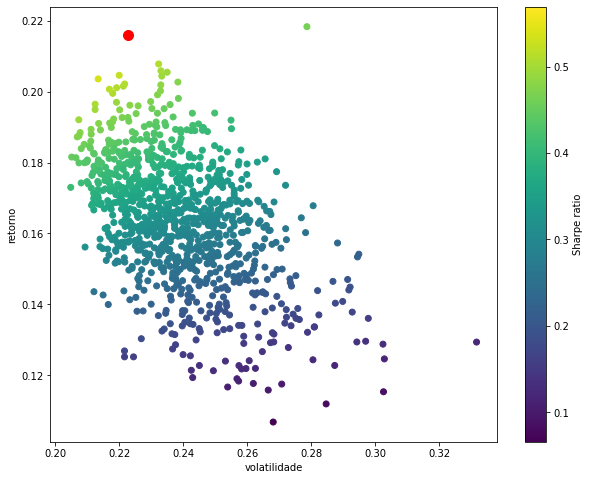

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(ls_volatilidade, ls_retorno, c = ls_sharpe_ratio)
plt.colorbar(label = 'Sharpe ratio')
plt.xlabel('volatilidade')
plt.ylabel('retorno')
plt.scatter(melhor_volatilidade, melhor_retorno, c = 'red', s = 100)

<h2>Utilizando outros algoritmos para resolver o problema:</h2>

In [ ]:
!pip install mlrose

In [ ]:
!pip install six

In [ ]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose

In [ ]:
dataset_original = pd.read_csv('acoes.csv')
dinheiro_total = 9500
sem_risco = historico_selic.mean() / 100

In [ ]:
def fitness_function(solucao):
  dataset = dataset_original.copy()
  pesos = solucao / solucao.sum()

  for i in dataset.columns[1:]:
    dataset[i] = (dataset[i] / dataset[i][0])

  for i, acao in enumerate(dataset.columns[1:]):
    dataset[acao] = dataset[acao] * pesos[i] * dinheiro_total

  dataset.drop(labels=['Date'], axis=1, inplace=True)
  dataset['soma valor'] = dataset.sum(axis = 1)
  dataset['taxa retorno'] = 0.0

  for i in range(1, len(dataset)):
    dataset['taxa retorno'][i] = ((dataset['soma valor'][i] / dataset['soma valor'][i-1]) - 1) * 100

  sharpe_ratio = (dataset['taxa retorno'].mean() - sem_risco) / dataset['taxa retorno'].std() * np.sqrt(246)

  return sharpe_ratio

<h2>Obtendo os pesos por outro método:</h2>

In [ ]:
np.random.seed(100)
pesos = np.random.random(len(dataset_original.columns) - 1)
pesos = pesos / pesos.sum()
pesos

array([0.24506887, 0.12554113, 0.19145216, 0.38098353, 0.00212815,
       0.05482616])

<h2>Agora passando estes pesos obtidos como parâmetro na nova função construída que retorna o Sharpe Ratio:</h2>

In [ ]:
fitness_function(pesos)

-0.01062488919658442

<h2>Obetendo uma nova organização das ações e seus respectivos pesos</h2>

In [ ]:
def visualiza_alocacao(solucao):
  colunas = dataset_original.columns[1:]
  for i in range(len(solucao)):
    print(colunas[i], solucao[i] * 100)

In [ ]:
visualiza_alocacao(pesos)

Eztec 24.506887265363744
Equatorial 12.554113174124451
Taesa 19.145215544717736
RaiaDrogasil 38.098353266720494
Sanepar 0.21281454731067576
Ibovespa 5.482616201762893


In [ ]:
fitness = mlrose.CustomFitness(fitness_function)

In [ ]:
problema_maximizacao = mlrose.ContinuousOpt(length=6, fitness_fn=fitness, maximize=True, min_val=0, max_val=1)

In [ ]:
problema_minimizacao = mlrose.ContinuousOpt(length=6, fitness_fn=fitness, maximize=False, min_val=0, max_val=1)

<h2>Melhor distribuição dos pesos utilizando o Hill Climb</h2>

In [ ]:
melhor_solucao, melhor_custo = mlrose.hill_climb(problema_maximizacao, random_state=1)
melhor_solucao, melhor_custo

(array([0.        , 0.        , 0.        , 0.70233257, 0.        ,
        0.        ]), 0.23800560531911025)

<h2>Hill Climb garantindo a aplicação de todo o dinheiro na carteira de ações:</h2>

In [ ]:
melhor_solucao = melhor_solucao / melhor_solucao.sum()
melhor_solucao, melhor_solucao.sum()

(array([0., 0., 0., 1., 0., 0.]), 1.0)

In [ ]:
visualiza_alocacao(melhor_solucao)

Eztec 0.0
Equatorial 0.0
Taesa 0.0
RaiaDrogasil 100.0
Sanepar 0.0
Ibovespa 0.0


<h2>Encontrando o retorno com o melhor peso do Hill Climb:</h2>

In [ ]:
_, _, _, soma_valor = alocacao_ativos(pd.read_csv('acoes.csv'), 9500, melhores_pesos=melhor_solucao)
soma_valor

48906.56033649933

<h2>Pior distribuição de pesos, segundo o Hill Climb</h2>

In [ ]:
pior_solucao, pior_custo = mlrose.hill_climb(problema_minimizacao, random_state=1)
pior_solucao, pior_custo

(array([0.017022  , 0.        , 0.50011437, 0.        , 0.04675589,
        0.19233859]), -0.35608871813396803)

In [ ]:
pior_solucao = pior_solucao / pior_solucao.sum()
pior_solucao, pior_solucao.sum()

(array([0.02250901, 0.        , 0.661325  , 0.        , 0.06182754,
        0.25433846]), 1.0000000000000002)

In [ ]:
visualiza_alocacao(pior_solucao)

Eztec 2.2509005500842507
Equatorial 0.0
Taesa 66.13249972908169
RaiaDrogasil 0.0
Sanepar 6.182753570970665
Ibovespa 25.43384614986341


<h2>Retorno dos piores pesos:</h2>

In [ ]:
_, _, _, soma_valor = alocacao_ativos(pd.read_csv('acoes.csv'), 9500, melhores_pesos=pior_solucao)
soma_valor

20724.390024872206